In [1]:
bnbIdAuthor = 'http://bnb.data.bl.uk/id/person/WoolfVirginia1882-1941'
#bnbIdAuthor = 'http://bnb.data.bl.uk/id/person/ShakespeareWilliam1564-1616'

In [2]:
import folium #https://anaconda.org/conda-forge/folium
import requests
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize  

In [3]:
url = 'https://bnb.data.bl.uk/sparql'

#duda 1) no entiendo esta parte de la query: ?resource ?p <{0}>
#duda 2) dct, schema, blt, c4dm, schema sí se usan, ¿es necesario poner todos los demás prefijos?
#duda 3) ¿qué es query.format()?

query = """
PREFIX bibo: <http://purl.org/ontology/bibo/>
PREFIX bio: <http://purl.org/vocab/bio/0.1/>
PREFIX blt: <http://www.bl.uk/schemas/bibliographic/blterms#>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX event: <http://purl.org/NET/c4dm/event.owl#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
PREFIX isbd: <http://iflastandards.info/ns/isbd/elements/>
PREFIX org: <http://www.w3.org/ns/org#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX rdau: <http://rdaregistry.info/Elements/u/>
PREFIX madsrdf: <http://www.loc.gov/mads/rdf/v1#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX void: <http://rdfs.org/ns/void#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX umbel: <http://umbel.org/umbel#>
PREFIX schema: <http://schema.org/>
PREFIX c4dm: <http://purl.org/NET/c4dm/event.owl#>

SELECT DISTINCT ?resource ?title ?date ?place WHERE {{
   graph <http://bnb.data.bl.uk/id/graph/BNBCIP> {{
      ?resource ?p <{0}> ;
         dct:title ?title ;
         schema:datePublished ?date .
      OPTIONAL {{
          ?resource blt:projectedPublication ?publication .
          ?publication c4dm:place ?place .
          FILTER regex(?place, "geonames", "i")        
      }}
      OPTIONAL {{
          ?resource blt:publication ?publication .
          ?publication c4dm:place ?place .
          FILTER regex(?place, "geonames", "i")        
      }}
   }}
}} LIMIT 500
"""

query = query.format(bnbIdAuthor) #aquí se pone el autor

# use json as a result
headers = {'Accept': 'application/sparql-results+json'}
r = requests.get(url, params = {'format': 'application/sparql-results+json', 'query': query}, headers=headers)
print('Elements retrieved!')

Elements retrieved!


In [4]:
query

'\nPREFIX bibo: <http://purl.org/ontology/bibo/>\nPREFIX bio: <http://purl.org/vocab/bio/0.1/>\nPREFIX blt: <http://www.bl.uk/schemas/bibliographic/blterms#>\nPREFIX dct: <http://purl.org/dc/terms/>\nPREFIX event: <http://purl.org/NET/c4dm/event.owl#>\nPREFIX foaf: <http://xmlns.com/foaf/0.1/>\nPREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>\nPREFIX isbd: <http://iflastandards.info/ns/isbd/elements/>\nPREFIX org: <http://www.w3.org/ns/org#>\nPREFIX owl: <http://www.w3.org/2002/07/owl#>\nPREFIX rdau: <http://rdaregistry.info/Elements/u/>\nPREFIX madsrdf: <http://www.loc.gov/mads/rdf/v1#>\nPREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>\nPREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\nPREFIX skos: <http://www.w3.org/2004/02/skos/core#>\nPREFIX void: <http://rdfs.org/ns/void#>\nPREFIX xsd: <http://www.w3.org/2001/XMLSchema#>\nPREFIX umbel: <http://umbel.org/umbel#>\nPREFIX schema: <http://schema.org/>\nPREFIX c4dm: <http://purl.org/NET/c4dm/event.owl#>\n\nSELECT DIS

In [5]:
bnbdata = json.loads(r.text)

with open('bnb_records_virginia.csv', 'w', newline='') as file:
    csv_out = csv.writer(file, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)    

#csv_out = csv.writer(open('bnb_records_virginia.csv', 'w'), delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
#csv_out = csv.writer(open('bnb_records.csv', 'w'), delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)

    csv_out.writerow(['resource', 'place', 'title', 'date'])

    for i in bnbdata['results']['bindings']:
        print(i['place']['value'])
        resource = place = title = date =''

        resource = i['resource']['value']
        place = i['place']['value']
        title = i['title']['value']
        date = i['date']['value']

        csv_out.writerow([resource,place,title,date])

http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6252001/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6252001/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6252001/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6252001/
http://sws.geonames.org/6269131/
http://sws.geonames.org/6252001/
http://sws

In [6]:
df = pd.read_csv('bnb_records_virginia.csv')
#df = pd.read_csv('bnb_records.csv')

In [7]:
df

,resource,place,title,date
0,http://bnb.data.bl.uk/id/resource/013001764,http://sws.geonames.org/6269131/,The years,2004-12
1,http://bnb.data.bl.uk/id/resource/019599487,http://sws.geonames.org/6269131/,Mrs Dalloway,2020-01
2,http://bnb.data.bl.uk/id/resource/017816985,http://sws.geonames.org/6269131/,Mrs Dalloway,2016-05
3,http://bnb.data.bl.uk/id/resource/015711457,http://sws.geonames.org/6252001/,Mrs Dalloway,2011-04
4,http://bnb.data.bl.uk/id/resource/018460540,http://sws.geonames.org/6269131/,Orlando,2017-10
5,http://bnb.data.bl.uk/id/resource/018460544,http://sws.geonames.org/6269131/,A room of one's own,2017-10
6,http://bnb.data.bl.uk/id/resource/018460549,http://sws.geonames.org/6269131/,Mrs Dalloway,2017-10
7,http://bnb.data.bl.uk/id/resource/018460551,http://sws.geonames.org/6269131/,To the lighthouse,2017-10
8,http://bnb.data.bl.uk/id/resource/018462175,http://sws.geonames.org/6269131/,The illustrated letters of Virginia Woolf,2017-10
9,http://bnb.data.bl.uk/id/resource/018463437,http://sws.geonames.org/6252001/,Monday or Tuesday,2017-08


In [8]:
places_by_number = df.groupby("place")["resource"].count()

In [9]:
places_by_number

place
http://sws.geonames.org/6252001/     5
http://sws.geonames.org/6269131/    31
Name: resource, dtype: int64

In [10]:
places_by_number[['http://sws.geonames.org/6269131/']][0]

31

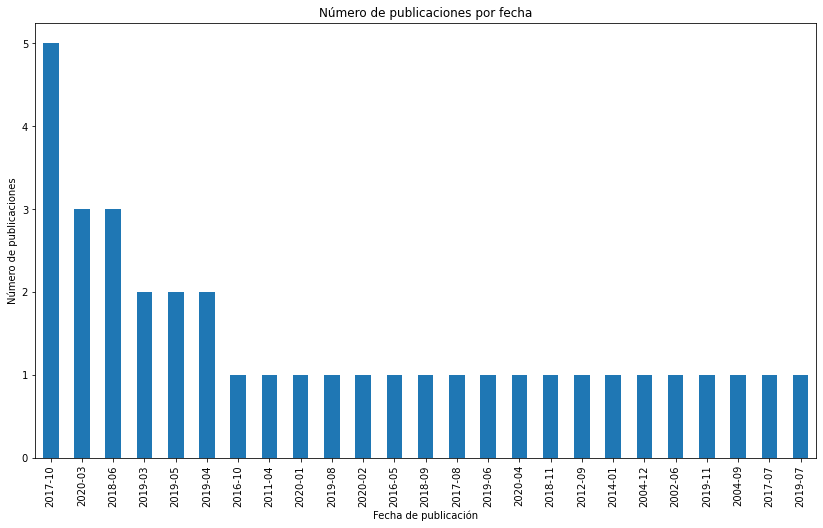

In [11]:
ax = df['date'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Número de publicaciones por fecha") 
ax.set_xlabel("Fecha de publicación")
ax.set_ylabel("Número de publicaciones")
plt.show()

In [12]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [13]:
df = df.sort_values('year')

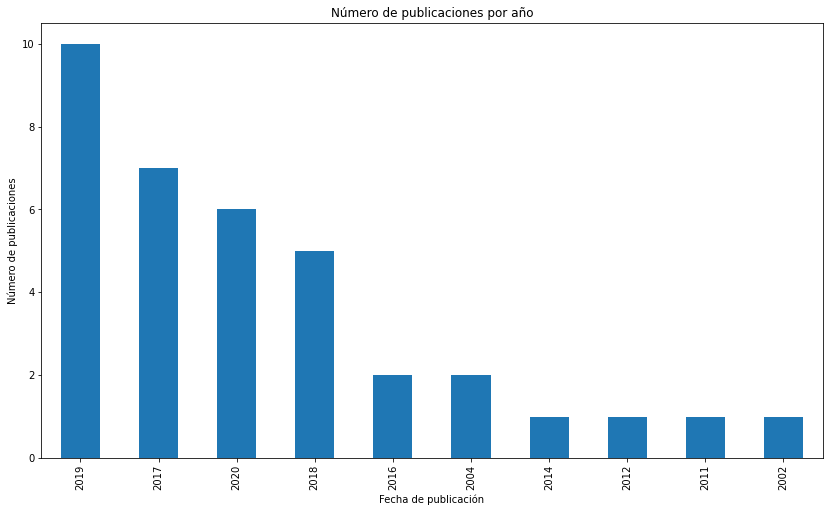

In [14]:
ax = df['year'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Número de publicaciones por año") #duda 4) cómo se podrían ordenar por año?
ax.set_xlabel("Fecha de publicación")
ax.set_ylabel("Número de publicaciones")
plt.show()

In [15]:
# Get unique values
places = pd.unique(df['place']).tolist()
strplaces = ''
for a in sorted(places):
    print(a)
    strplaces = strplaces + ' \"' + a.replace("http://sws.geonames.org/", "").replace("/", "") + '\"'

http://sws.geonames.org/6252001/
http://sws.geonames.org/6269131/


In [16]:
strplaces #sólo hay cinco lugares distintos

' "6252001" "6269131"'

In [17]:
url = 'https://query.wikidata.org/sparql'
query = """
PREFIX bibo: <http://purl.org/ontology/bibo/>
SELECT ?idgeonames ?lat ?lon ?x ?xLabel 
WHERE {{ 
  values ?idgeonames {{ {0} }} 
  ?x wdt:P1566 ?idgeonames ; 
   p:P625 [
     psv:P625 [
       wikibase:geoLatitude ?lat ;
       wikibase:geoLongitude ?lon ;
       wikibase:geoGlobe ?globe ;
     ];
     ps:P625 ?coord
   ]
   SERVICE wikibase:label {{ bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }}
}}
"""

query = query.format(strplaces) #aquí se metieron los ids únicos de geonames que en el paso anterior
print(query)

# use json as a result
r = requests.get(url, params = {'format': 'json', 'query': query})
geopoints = r.json()
print(geopoints)


PREFIX bibo: <http://purl.org/ontology/bibo/>
SELECT ?idgeonames ?lat ?lon ?x ?xLabel 
WHERE { 
  values ?idgeonames {  "6252001" "6269131" } 
  ?x wdt:P1566 ?idgeonames ; 
   p:P625 [
     psv:P625 [
       wikibase:geoLatitude ?lat ;
       wikibase:geoLongitude ?lon ;
       wikibase:geoGlobe ?globe ;
     ];
     ps:P625 ?coord
   ]
   SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

{'head': {'vars': ['idgeonames', 'lat', 'lon', 'x', 'xLabel']}, 'results': {'bindings': [{'idgeonames': {'type': 'literal', 'value': '6252001'}, 'x': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q30'}, 'xLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'United States of America'}, 'lat': {'datatype': 'http://www.w3.org/2001/XMLSchema#double', 'type': 'literal', 'value': '38.895'}, 'lon': {'datatype': 'http://www.w3.org/2001/XMLSchema#double', 'type': 'literal', 'value': '-77.036666666667'}}, {'idgeonames': {'type': 'literal', 'value': '6269131'}, 

In [18]:
map = folium.Map(location=[0,0], zoom_start=1.5)

for geo in geopoints['results']['bindings']:
    idwikidata = geo['x']['value']
    lat = geo['lat']['value']
    lon = geo['lon']['value']
    idgeonames = geo['idgeonames']['value']
    label = geo['xLabel']['value']
    print(lat, lon)
    
    # adding a text to the popup
    count = places_by_number[['http://sws.geonames.org/' + idgeonames + '/']][0]
    popup = str(count) + " records published in <a hreh='" + str(idwikidata) + "'>" + label + "</a>"
    
    folium.Marker([lat,lon], popup= popup).add_to(map)

38.895 -77.036666666667
53.0 -1.0


In [19]:
map